# Tree base model

## Decision Tree(CART : Classification and Regression Tree)
> **`Decision Tree`** 모델은 **예측/분류가 모두 가능**한 **지도학습** 머신러닝 모델이다.   
스무고개 게임을 하듯 여러 개의 가정을 데이터에 반영하고 이를 바탕으로 결정경계(decision boundary)를 생성  
모델 예측 및 분류 결과에 따른 해석이 굉장히 용이하여 **모델 해석이 필요한 문제에 사용**한다.ex)신용평가, 모델분류  
최근에는 `Decision Tree`모델을 베이스로 한 부스팅 트리 모델(**`Xgboost`**, **`LightGBM`**, **`Catboost`**)등으로 데이터분석 대회 수상을 하면서 실무 적용 케이스가 많아졌다.

### 모델구조
> 뿌리 노드(root node) : 최상위 노드, 모든 샘플 포함  
잎 노드(leaf node) : 최하위 노드, 여기에 속한 샘플이 어떤 클래스인지 결정 됨  
노드(node) : 뿌리 노드와 잎 노드 사이에 있는 노드  
가지(branch) : 노드를 나누는 기준  
깊이(depth) : 뿌리 노드와 잎 노드 까지의 노드 갯수

![decisiontree](https://drive.google.com/uc?id=1gTRvBWaKpbR5VI9Iv1_OlwKg4YQGPxXr)

### 모델학습
#### 불순도
> `Decision Tree` 모델을 학습시키는 방법  
정보화 이론에서 사용하는 Gini 계수와 엔트로피를 사용한다.  
불순도가 0.5에 가까수록 불순도가 높고 0에 가까울 수록 순도가 높다.  
즉, 한 노드의 불순도가 가능한 많이 떨어지도록(순도가 올라가도록) 노드를 나눈다.

$$ Gini = 1 - \sum_1^n{(p_i)^2} $$

$$ Entropy = - \sum_1^n{p_iln(p_i)} $$

#### Gini index
위 예시에서 뿌리 노드 기준 지니계수 계산법  
class1 : 삼각형  
class2 : 동그라미  
>X < 0
>> True = class1 3개, class2 4개  
$1 - ({3 \over 3+4})^2 - ({4 \over 3+4})^2 = 0.48$  
False = class1 4개, class2 3개  
$1 - ({4 \over 4+3})^2 - ({3 \over 4+3})^2 = 0.48$  
total Gini 계수  
$1 - ({7 \over 7+7})0.48 - ({7 \over 7+7})0.48 = 0.52$

위 예시에서 잎 노드 기준 지니계수 계산법  
class1 : 삼각형  
class2 : 동그라미  
>Y < 1
>> True = class1 3개, class2 0개  
$1 - ({3 \over 3})^2 - ({0 \over 3})^2 = 0$  
False = class1 0개, class2 4개  
$1 - ({0 \over 4})^2 - ({4 \over 4})^2 = 0$  
total Gini 계수  
$1 - ({4 \over 4+3})0 - ({3 \over 4+3})0 = 0$

위의 예시에서는 최적화 과정을 거치지 않은 결정경계를 생성했지만 실제 알고리즘은 각 분지 기준에 대한 학습을 진행합니다.

### Decision Tree classifier 실습

In [149]:
# 필요모듈 import 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [103]:
# 데이터로드
iris = load_iris()

In [104]:
# 데이터 설명
# sklearn dataset의 iris 데이터 사용
# 붓꽃의 꽃받침 길이/넓이, 꽃잎의 길이/넓이를 변수로 가진 붓꽃의 종류 구분 데이터
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [105]:
# 데이터 분할
from sklearn.model_selection import train_test_split
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=iris.target)

In [106]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [107]:
# 모델 생성
dtc_model = DecisionTreeClassifier(criterion='gini')

In [108]:
# 모델 학습
dtc_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [109]:
# 모델평가
dtc_model_y_pred = tree_model.predict(X_test)

In [110]:
# test셋 분류 결과 확인
dtc_model_y_pred

array([2, 1, 0, 1, 1, 1, 0, 2, 2, 1, 1, 0, 1, 1, 1, 0, 2, 1, 0, 2, 2, 0,
       0, 1, 1, 0, 2, 2, 0, 2, 2, 1, 0, 0, 0, 0, 2, 2])

In [111]:
# 모델 평가지표 출력
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(f'accuracy_score : {accuracy_score(y_test, dtc_model_y_pred)}')
print()
print('Confusion Matrix')
print(confusion_matrix(y_test, dtc_model_y_pred))
print()
print(classification_report(y_test, dtc_model_y_pred))

accuracy_score : 1.0

Confusion Matrix
[[13  0  0]
 [ 0 13  0]
 [ 0  0 12]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



### feature importance
트리 기반 모델은 트리를 분기하는 과정에서 어떤 변수가 모델을 생성하는데 중요한지에 대한 변수 중요도를 살펴볼 수 있다.

<BarContainer object of 4 artists>

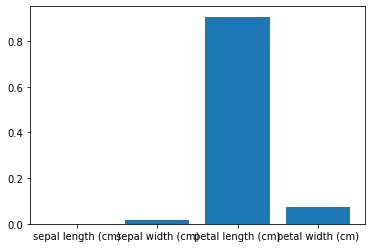

In [112]:
# feature importance 시각화
plt.bar(iris.feature_names, dtc_model.feature_importances_)

### model plotting

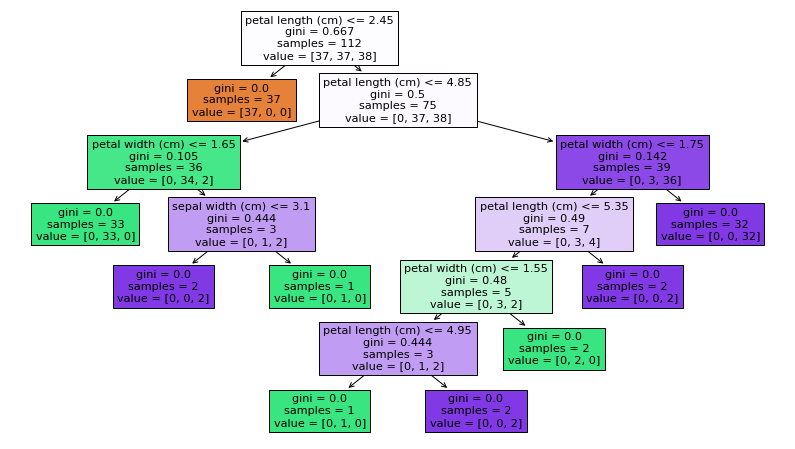

In [113]:
# 모델 시각화
plt.figure(figsize=(14, 8))
tree.plot_tree(dtc_model, filled=True, feature_names=iris.feature_names);

### 가지치기 (pruning)
>`Decision Tree`모델은 모든 **잎 노드의 불순도가 0이 되는 순간까지 모델을 성장**시키면서 크기를 키워나간다.  
순수 노드로만 이루어진 트리 모델은 훈련 데이터를 100% 정확도로 맞출 수 있다.  
이러한 특성 때문에 트리 모델은 **과적합에 취약**하다.  
과적합 방지를 위해서는 **트리의 복잡도를 제어** 할 필요가 있다.

>과적합 방지를 위한 모델링 파라메터  
>> - **`max_depth`** : 트리의 최대 깊이  
- `max_leaf_nodes` : 잎 노드의 최대개수  
- `min_sample_leaf` : 잎 노드가 되기 위한 최소 샘플 갯수  
- `min_sample_split` : 잎 노드가 분지 되기 위한 최소 샘플 갯수

위의 iris 데이터는 3개의 클래스로 이루어진 데이터셋이지만 모델플로팅 결과 2뎁스의 노드에서 어느정도 데이터 구분이 되었습니다.  
이를 기준으로 사후 가지치기를 진행 해 보겠습니다.

## Decision tree regressor
> `Decision Tree`모델은 알고리즘 특성으로 분류 및 예측 모델링에 모두 사용이 가능하다.  
일반적으로 잎 노드에 속한 학습샘플의 값의 평균을 바탕으로 예측값을 결정한다.  
회귀모델 평가 방법인 MSE를 각 노드에 속한 샘플에 적용하고 이를 최소화 시킨다.  

![treer](https://drive.google.com/uc?id=1VNT8MulVBhqDLj0tVTRrf8s-8EIv5RZP)
![treer2](https://drive.google.com/uc?id=1ICIKUdPHbx9ZkBSKzOgl7248QaIQrq2U)

### Decision tree regressor 실습

In [115]:
# 보스턴 집값 데이터 로딩
df = pd.read_csv('./data/boston.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,y
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [116]:
# 데이터 분할
X = df.drop('y', axis=1)
y = df['y']

# 훈련셋과 테스트셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [136]:
# 모델 생성
from sklearn.tree import DecisionTreeRegressor
dtr_model = DecisionTreeRegressor(criterion='mse')

In [137]:
# 모델 학습
dtr_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [138]:
# 모델 예측
dtr_y_pred = dtr_model.predict(X_test)

In [139]:
# 모델 평가지표 출력
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
r2 = round(r2_score(y_test, dtr_y_pred) * 100, 4)
MSE = mean_squared_error(y_test, dtr_y_pred)
MAE = round(mean_absolute_error(y_test, dtr_y_pred), 4)

print(f'R2 score : {r2}')
print(f'RMSE score : {round(np.sqrt(MSE), 4)}')
print(f'MAE score : {MAE}')

R2 score : 81.5325
RMSE score : 3.5961
MAE score : 2.8205


<BarContainer object of 13 artists>

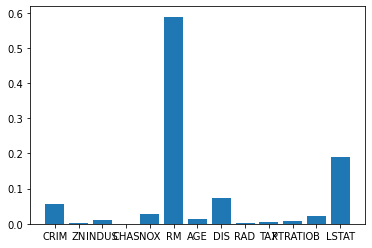

In [140]:
# feature importance
plt.bar(X.columns, dtr_model.feature_importances_)

## Random Forest
>**`Random forest`** 는 **`Decision Tree`** 모델의 **모형 결합(ensemble)방법론**  

### ensemble(앙상블)
> **복수의 예측 모형을 결합**하여 더 나은 성능의 예측을 하려는 시도이다.  
단일 모형을 사용할 때 보다 **성능 분산이 감소**하고, 즉 **과적합을 방지**한다.  
개별 모형이 성능이 안좋을 경우에는 결합 모형의 성능이 더 향상된다.  
앙상블 방법론에는 **배깅**, **부스팅**, **스태킹**이 있다.

![ensemble](https://drive.google.com/uc?id=1JJVUyYwHD2ddpigy0D3mG5KFLc5Yq1qR)

### bagging(배깅) : Bootstrap Aggregating
> **복원 추출**로 여러개의 sub sample 데이터셋을 만든다.  
각각의 데이터셋을 개별 모델에 학습시켜 서로 다른 결과를 얻는다.  
투표법 혹은 평균법을 사용하여 개별 모델 결과를 바탕으로 최종 추정치를 얻는다.  

![bootstrap](https://drive.google.com/uc?id=1CMsFhLTApJqrOlGdqVE4qWH89j04w_xF)

### Random Forest bootstrap
> 복원 추출 된 sub sample 에서 랜덤으로 feature를 선택하여 모델 학습에 사용한다.

![bootstrap2](https://drive.google.com/uc?id=1MfkxFwIsQJgjT_VD_CFl_fM3WJfc_3BG)

### Ramdom Forest 실습

In [143]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

### 과적합 방지를 위한 모델링 파라메터  
> - **n_estimators** : 사용 할 트리 모델 갯수  
- **max_depth** : 트리의 최대 깊이

In [144]:
# 모델 생성
rfc = RandomForestRegressor()

In [145]:
rfc.fit(X_train, y_train)

RandomForestRegressor()

In [146]:
rfc_y_pred = rfc.predict(X_test)

In [147]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
r2 = round(r2_score(y_test, rfc_y_pred) * 100, 4)
MSE = mean_squared_error(y_test, rfc_y_pred)
MAE = round(mean_absolute_error(y_test, rfc_y_pred), 4)

print(f'R2 score : {r2}')
print(f'RMSE score : {round(np.sqrt(MSE), 4)}')
print(f'MAE score : {MAE}')

R2 score : 85.4142
RMSE score : 3.1959
MAE score : 2.1632


## Boosting Tree
> 배깅과 부스팅의 차이점은 학습을 위해 사용하는 개별모델을 병렬/직렬로 구성함에 있다.  
배깅의 경우 sub sample에 따라 개별 모델을 모두 학습시키고 결과를 투표 혹은 평균을 내어 예측한다면  
부스팅은 **개별 모델의 학습을 순차적**으로 시키며 이전 개별 모델의 결과 중 **오분류 된 데이터 혹은 오차에 가중치 부여**  
초기에는 동일 가중치를 갖지만 각 학습 과정을 거치며 복원 추출 시 가중치의 분포/이전 round의 오차를 고려  

>> 해당모델에는 `Adaboost`, `GBM`, `Xgboost`, `lightGBM`, `catboost`가 있다.

### bagging 과 boosting
![boosting](https://drive.google.com/uc?id=1rhB9YkRkKILRb0GqOfa99K-EQ7CEcrPc)

### Adaptive booting(Adaboost)
> a -> f 순서로 학습이 진행 되고 있다. 각 학습 단계(round)에서 오분류 된 데이터에 가중치를 부여하고  
다음 라운드에서 가중치가 부여 된 데이터를 잘 맞추기 위한 개별모델이 학습 된다.  
최종 모델은 개별 모델의 결과가 합쳐져서 최종 모델링이 된다.

![boosting2](https://drive.google.com/uc?id=1VKmbttZT4aPOAaYuqhw2os7nFMOs6MMJ)

### gradient boost
이전 round 모델의 데이터별 오류를 학습하는 모델을 사용하여 점진적으로 총 모델링 오차를 줄이는 부스팅 방법

$$y = h_0(x) + error_0 $$
$$error_0 = h_1(x) + error_1 $$
$$error_1 = h_2(x) + error_2 $$
$$\vdots$$
$$y = h_0(x) + h_1(x) + h_2(x) + \cdots + small error $$

![gradient_boost](https://drive.google.com/uc?id=1Ty-CEINGgXuHtghd0GuDsxO1CfWahDYB)

### xgboost
> 머신러닝 알고리즘 대회인 kaggle, KDD cup등에서 우승을 한 팀들이 xgboost를 많이 활용한 것이 알려지면서 주목받음.  
boosting 모델에서 오류를 학습하여 다음 round에 반영시키는 것은 gadient boosting과 큰 차이가 없음.  
다만, 학습을 위한 비용함수에 규제화 식이 추가되어 모델이 과적합 되는 것을 방지함.  
규제화를 통해 복잡한 모델에 패널티를 부여  

$$obj^{(t)} = \sum_1^{n} l(y_i, \hat{y}_i^{(t)}) + \sum_{i=1}^t \Omega(f_i) $$


In [148]:
from xgboost import XGBClassifier, XGBRegressor, plot_importance

In [170]:
df = pd.read_csv('./data/boston.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,y
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [171]:
y = df['y']

In [172]:
X = df.drop('y', axis=1)

In [173]:
X.shape, y.shape

((506, 13), (506,))

In [174]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [175]:
xgb = XGBRegressor(objective='reg:squarederror')
'''
xbgoost 주요 파라메터
XGBRegressor(
    max_depth=3, 트리의 최대 깊이
    learning_rate=0.1, 학습률 학습 round별로 가중치를 얼만큼 사용할 것인지 0.01 ~ 0.2 사용
    n_estimators=100, 나무 갯수
    verbosity=1, 
    silent=None, 동작메세지 프린트 여부 0, 1
    objective='reg:linear', 비용함수 reg:squarederror, binary:logistic, multi:softmax
    booster='gbtree', gbtree:트리모델, gblinear:선형모델
    n_jobs=1,
    nthread=None,
    gamma=0,
    min_child_weight=1,
    max_delta_step=0,
    subsample=1,
    colsample_bytree=1,
    colsample_bylevel=1,
    colsample_bynode=1,
    reg_alpha=0,
    reg_lambda=1,
    scale_pos_weight=1,
    base_score=0.5,
    random_state=0,
    seed=None,
    missing=None,
    importance_type='gain',
    **kwargs,
)
'''

In [176]:
xgb.fit(X_train, y_train)

XGBRegressor(objective='reg:squarederror')

In [177]:
prediction = xgb.predict(X_test)

In [178]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
r2 = round(r2_score(y_test, prediction) * 100, 4)
MSE = mean_squared_error(y_test, prediction)
MAE = round(mean_absolute_error(y_test, prediction), 4)

print(f'R2 score : {r2}')
print(f'RMSE score : {round(np.sqrt(MSE), 4)}')
print(f'MAE score : {MAE}')

R2 score : 82.47
RMSE score : 3.2426
MAE score : 2.1892


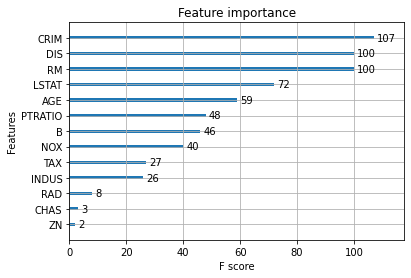

In [179]:
plot_importance(xgb);